In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
# Read the data and create DataFrame from it
data = pd.read_csv('11.csv', sep=';', decimal=',')

In [3]:
data.head()

,Unnamed: 0,name,area,class,gray_Mean,gray_Variance,gray_Skewness,gray_Kurtosis,gray_Perc.01%,gray_Perc.10%,...,"b_S(5,-5)SumVarnc","b_S(5,-5)SumEntrp","b_S(5,-5)Entropy","b_S(5,-5)DifVarnc","b_S(5,-5)DifEntrp",b_GrMean,b_GrVariance,b_GrSkewness,b_GrKurtosis,b_GrNonZeros
0,436697,22-Dec-2016 13-43-41,100,DZN,75.54,8.2884,-0.393290,-0.656038,68.0,71.0,...,2901.143532,0.913105,1.420585,29.100282,0.867934,2.760527,2.676367,0.334689,-0.004993,0.906250
1,436698,22-Dec-2016 13-43-41,100,DZN,67.59,14.0819,-0.367885,-1.074752,60.0,62.0,...,2228.018342,0.950978,1.391802,6.977909,0.711356,3.481352,2.755186,-0.166114,-0.695810,0.953125
2,436699,22-Dec-2016 13-43-41,100,DZN,60.86,5.3404,0.360231,-0.899669,57.0,58.0,...,1910.459716,0.757815,1.315165,18.677696,0.819770,2.808814,2.735563,1.045370,1.092342,0.984375
3,436700,22-Dec-2016 13-43-41,100,DZN,60.32,60.9776,-0.748717,-0.873833,44.0,47.0,...,1700.315300,1.113652,1.626723,38.558999,1.015338,5.149898,6.853554,0.669685,-0.053380,1.000000
4,436701,22-Dec-2016 13-43-41,100,DZN,75.00,5.2200,-0.090556,-0.474347,70.0,71.0,...,2860.139183,0.738433,1.300173,16.376975,0.858845,2.469800,1.993839,0.061216,-0.683562,0.906250


In [4]:
data[['name', 'class']].head() 

,name,class
0,22-Dec-2016 13-43-41,DZN
1,22-Dec-2016 13-43-41,DZN
2,22-Dec-2016 13-43-41,DZN
3,22-Dec-2016 13-43-41,DZN
4,22-Dec-2016 13-43-41,DZN


In [5]:
data = data.drop('name', axis=1)
Y = data.loc[:, data.columns == 'class']
X = data.loc[:, data.columns != 'class']

In [6]:
Y.head()

,class
0,DZN
1,DZN
2,DZN
3,DZN
4,DZN


In [7]:
X.head()

,Unnamed: 0,area,gray_Mean,gray_Variance,gray_Skewness,gray_Kurtosis,gray_Perc.01%,gray_Perc.10%,gray_Perc.50%,gray_Perc.90%,...,"b_S(5,-5)SumVarnc","b_S(5,-5)SumEntrp","b_S(5,-5)Entropy","b_S(5,-5)DifVarnc","b_S(5,-5)DifEntrp",b_GrMean,b_GrVariance,b_GrSkewness,b_GrKurtosis,b_GrNonZeros
0,436697,100,75.54,8.2884,-0.393290,-0.656038,68.0,71.0,77.0,80.0,...,2901.143532,0.913105,1.420585,29.100282,0.867934,2.760527,2.676367,0.334689,-0.004993,0.906250
1,436698,100,67.59,14.0819,-0.367885,-1.074752,60.0,62.0,68.0,71.0,...,2228.018342,0.950978,1.391802,6.977909,0.711356,3.481352,2.755186,-0.166114,-0.695810,0.953125
2,436699,100,60.86,5.3404,0.360231,-0.899669,57.0,58.0,61.0,64.0,...,1910.459716,0.757815,1.315165,18.677696,0.819770,2.808814,2.735563,1.045370,1.092342,0.984375
3,436700,100,60.32,60.9776,-0.748717,-0.873833,44.0,47.0,64.0,68.0,...,1700.315300,1.113652,1.626723,38.558999,1.015338,5.149898,6.853554,0.669685,-0.053380,1.000000
4,436701,100,75.00,5.2200,-0.090556,-0.474347,70.0,71.0,75.0,78.0,...,2860.139183,0.738433,1.300173,16.376975,0.858845,2.469800,1.993839,0.061216,-0.683562,0.906250


In [8]:
X.describe()

,Unnamed: 0,area,gray_Mean,gray_Variance,gray_Skewness,gray_Kurtosis,gray_Perc.01%,gray_Perc.10%,gray_Perc.50%,gray_Perc.90%,...,"b_S(5,-5)SumVarnc","b_S(5,-5)SumEntrp","b_S(5,-5)Entropy","b_S(5,-5)DifVarnc","b_S(5,-5)DifEntrp",b_GrMean,b_GrVariance,b_GrSkewness,b_GrKurtosis,b_GrNonZeros
count,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,...,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000
mean,443224.500000,150.585784,96.254364,129.296636,-0.017162,0.280239,79.171262,85.588542,96.884344,105.803385,...,7583.373416,1.117667,1.674840,75.329206,0.946017,4.539982,7.800437,0.538672,0.076441,0.971969
std,3769.086892,54.714008,56.117444,266.620494,0.898016,2.438761,42.945108,48.626013,58.087830,61.667222,...,10411.572775,0.201292,0.227815,151.173722,0.195632,2.058940,10.905071,0.369186,1.011380,0.024650
min,436697.000000,100.000000,34.630000,0.641900,-5.099406,-1.662739,31.000000,33.000000,34.000000,37.000000,...,21.886866,0.519481,0.929611,1.919168,0.442268,1.558813,0.570103,-0.589856,-1.458017,0.828125
25%,439960.750000,100.000000,54.239028,7.767127,-0.381784,-0.792883,48.000000,50.000000,54.000000,60.000000,...,693.818202,0.979165,1.518797,9.965087,0.802260,3.235369,3.053082,0.293227,-0.523740,0.958678
50%,443224.500000,121.000000,73.181187,20.001458,0.027967,-0.352191,65.000000,68.000000,73.000000,79.000000,...,2427.906559,1.072661,1.648122,18.136813,0.900519,3.748919,4.047057,0.503083,-0.153380,0.975309
75%,446488.250000,169.000000,131.255682,73.262298,0.468372,0.338408,101.000000,112.000000,132.000000,147.000000,...,11552.331860,1.221447,1.807004,58.661337,1.060938,5.087449,8.482724,0.733595,0.361828,0.988616
max,449752.000000,400.000000,223.190000,1992.576737,4.031808,32.434843,219.000000,220.000000,223.000000,231.000000,...,52788.693309,1.873434,2.571574,1951.656937,1.650623,17.685676,172.929845,3.266544,15.479892,1.000000


In [9]:
Y.describe()

,class
count,13056
unique,5
top,DZN
freq,3252


In [10]:
## Заметим, что у нас 5 уникальных классов. 5 + май = 10

In [11]:
X.columns

Index(['Unnamed: 0', 'area', 'gray_Mean', 'gray_Variance', 'gray_Skewness',
       'gray_Kurtosis', 'gray_Perc.01%', 'gray_Perc.10%', 'gray_Perc.50%',
       'gray_Perc.90%',
       ...
       'b_S(5,-5)SumVarnc', 'b_S(5,-5)SumEntrp', 'b_S(5,-5)Entropy',
       'b_S(5,-5)DifVarnc', 'b_S(5,-5)DifEntrp', 'b_GrMean', 'b_GrVariance',
       'b_GrSkewness', 'b_GrKurtosis', 'b_GrNonZeros'],
      dtype='object', length=938)

In [12]:
# Списки признаков
xETC = X.loc[:, ['g_S(3,-3)SumAverg','b_S(1,0)SumVarnc','r_S(4,-4)SumVarnc','b_Mean','g_S(0,4)SumAverg','gray_S(5,-5)SumAverg','g_S(0,3)SumVarnc','b_S(0,2)SumOfSqs','b_S(3,0)SumVarnc','r_S(1,1)SumVarnc']]

In [13]:
classes = data['class'].unique()
labels = []
for j in range(len(X)):
    for p in range(len(classes)):
        if Y.iloc[j].values==classes[p]:
            labels.append(p)
classes  

array(['DZN', 'HardExudates', 'Makula', 'Otek', 'Vessels'], dtype=object)

In [14]:
import theano as th
import theano.tensor as T

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [30]:
# Define some useful utilities for creating main components of the perceptron

def init_weights(D, H):
    # D - input dimension
    # H - outputs dimension, i.e. number of neurons
    W = np.random.randn(D, H) / np.sqrt(D)
    b = np.zeros(H)
    
    W = th.shared(W)
    b = th.shared(b)
    return W, b
    

def create_layer(x, W, b, activation=T.tanh):
    # In this example we're going to use hyperbolic tangent
    # as an activation function, but you can use other ones.
    # We encourage you to do so because activation
    # has a great influence on the accuracy of the model.
    x = T.dot(x, W) + b
    if activation is not None:
        x = activation(x)
    return x

In [31]:
# Create 2 layers
x = T.vector('x')

In [32]:
W1, b1 = init_weights(D=938, H=350)
out_l1 = create_layer(x, W1, b1)

In [33]:
# The second (classification) layer with 5 neurons because we have 5 classes
W2, b2 = init_weights(D=350, H=5)
out_l2 = create_layer(out_l1, W2, b2, activation=None)

In [34]:
classification_out = T.nnet.softmax(out_l2)

# Define softmat output as Theano function so that we can
# use it later
softmax_out = th.function(
    inputs=[x],
    outputs=classification_out
)

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATION: If x is a vector, Softmax will not automatically pad x anymore in next releases. If you need it, please do it manually. The vector case is gonna be supported soon and the output will be a vector.
  """Entry point for launching an IPython kernel.


In [ ]:
softmax_out(xETC.iloc[1].values)

In [36]:
# Negative log-likelihood
loss = -T.log(classification_out + 1e-13) # add small constant for numerical stability

In [37]:
label = T.scalar('y', dtype=T.int32) # Class index must be an integer

class_loss = loss[0, label] # Don't forget it was a matrix

loss_val = th.function(
    inputs=[x, label],
    outputs=class_loss
)

In [38]:
# Define the gradient step size 
learning_rate = 0.0001

In [39]:
# Calculate gradients with respect to the weights
W1_grad = T.grad(class_loss, W1)
b1_grad = T.grad(class_loss, b1)
W2_grad = T.grad(class_loss, W2)
b2_grad = T.grad(class_loss, b2)

# Calculate updated values for the weights
update_W1 = W1 - learning_rate * W1_grad
update_b1 = b1 - learning_rate * b1_grad
update_W2 = W2 - learning_rate * W2_grad
update_b2 = b2 - learning_rate * b2_grad

# Define updates
updates = [
    (W1, update_W1),
    (b1, update_b1),
    (W2, update_W2),
    (b2, update_b2)
]

# Define train operation
# - calculate loss
# - update weights 
train_op = th.function(
    inputs=[x, label],
    outputs=class_loss,
    updates=updates
)

In [25]:
# Normalizing data
Xnorm = (xETC.values - xETC.values.mean(axis=0))/xETC.values.std(axis=0)
XnormFull = (X.values - X.values.mean(axis=0))/X.values.std(axis=0)

In [26]:
Epoch = []
AccuracyETC = []
LossETC = []
Accuracy = []
Loss = []
epochs = 10

In [27]:
%%time
for i in range(epochs):
    # Do training
    for j in range(len(X)):
        label = labels[j]
        x_in = Xnorm[j]
        _ = train_op(x_in, label)

    # Do testing
    n_correct = 0
    loss_values = []
    for j in range(len(X)):
        label = labels[j]
        x_in = Xnorm[j]
        loss_values += [loss_val(x_in, label)]
        answer = softmax_out(x_in)

        n_correct += np.argmax(answer[0]) == label
    print('Epoch:', i)
    Epoch.append(i)
    print('Accuracy:', n_correct / len(X))
    AccuracyETC.append(n_correct / len(X))
    print('Mean loss:', sum(loss_values) / len(X))
    LossETC.append(sum(loss_values) / len(X))
    print()

Epoch: 0
Accuracy: 0.5933670343137255
Mean loss: 0.866911753478665

Epoch: 1
Accuracy: 0.68359375
Mean loss: 0.7417362267773114

Epoch: 2
Accuracy: 0.7337622549019608
Mean loss: 0.669085517371817

Epoch: 3
Accuracy: 0.7626378676470589
Mean loss: 0.6194975688880048

Epoch: 4
Accuracy: 0.7838541666666666
Mean loss: 0.5830545478405648

Epoch: 5
Accuracy: 0.7943474264705882
Mean loss: 0.5549457891065406

Epoch: 6
Accuracy: 0.8013939950980392
Mean loss: 0.5324385212681824

Epoch: 7
Accuracy: 0.8079044117647058
Mean loss: 0.5138610385200418

Epoch: 8
Accuracy: 0.8133425245098039
Mean loss: 0.498143102270396

Epoch: 9
Accuracy: 0.8178615196078431
Mean loss: 0.48457392309008807

CPU times: user 3h 57min 36s, sys: 35min 11s, total: 4h 32min 47s
Wall time: 1h 54min 29s


In [40]:
%%time 
for i in range(epochs):
    # Do training
    for j in range(len(X)):
        label = labels[j]
        x_in = XnormFull[j]
        _ = train_op(x_in, label)

    # Do testing
    n_correct = 0
    loss_values = []
    for j in range(len(X)):
        label = labels[j]
        x_in = XnormFull[j]
        loss_values += [loss_val(x_in, label)]
        answer = softmax_out(x_in)

        n_correct += np.argmax(answer[0]) == label
    print('Epoch:', i)
    print('Accuracy:', n_correct / len(X))
    Accuracy.append(n_correct / len(X))
    print('Mean loss:', sum(loss_values) / len(X))
    Loss.append(sum(loss_values) / len(X))
    print()

Epoch: 0
Accuracy: 0.7868412990196079
Mean loss: 0.5843286738493155

Epoch: 1
Accuracy: 0.8429074754901961
Mean loss: 0.4420437923004798

Epoch: 2
Accuracy: 0.8711703431372549
Mean loss: 0.3656098405143366

Epoch: 3
Accuracy: 0.889859068627451
Mean loss: 0.3170276014283009

Epoch: 4
Accuracy: 0.9020373774509803
Mean loss: 0.2834760876243834

Epoch: 5
Accuracy: 0.9109987745098039
Mean loss: 0.2587471938425499

Epoch: 6
Accuracy: 0.9170496323529411
Mean loss: 0.23950416525971802

Epoch: 7
Accuracy: 0.9220281862745098
Mean loss: 0.22383058553777638

Epoch: 8
Accuracy: 0.9258578431372549
Mean loss: 0.2105767324297736

Epoch: 9
Accuracy: 0.9298406862745098
Mean loss: 0.1990337146867817

CPU times: user 4h 59min 24s, sys: 46min 30s, total: 5h 45min 54s
Wall time: 2h 16min 57s


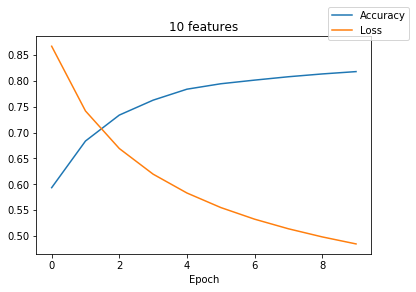

In [55]:
import matplotlib.pyplot as plt
plt.plot(Epoch,AccuracyETC,label='Accuracy')
plt.plot(Epoch,LossETC,label='Loss')
plt.xlabel("Epoch")
plt.title("10 features")
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

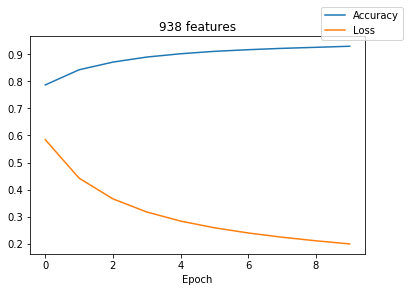

In [53]:
plt.plot(Epoch,Accuracy,label='Accuracy')
plt.plot(Epoch,Loss,label='Loss')
plt.xlabel("Epoch")
plt.title("938 features")
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

# Точность в предыдущей ЛР для 10 признаков составляла ~80%, в этой удалось увеличить до ~82%, используя 350 нейронов на скрытом уровне (10 эпоха). Для всех признаков из обучающего сета (938) удалось достигнуть точности в ~93% на 10 эпохе обучения.

Выводы:
+ точность возрастает при увеличении числа нейронов на скрытом уровне 
+ точность возрастает при увелчении кол-ва признаков
- продолжительность обучения растет с повышением числа нейронов и признаков